In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
age = df['age'] / 360
age_filtered = df[age <= 32 ]
age_filtered["age"] / 360

,age
6219,30.216667
22343,29.994444
30666,30.163889
55905,30.455556


**1. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.**

To calculate BMI = weight (kg) / Height (cm)^2  

In [6]:
df["overweight"] = (df['weight']/(df['height']/100)**2)
df['overweight'] = df['overweight'].apply(lambda x: 1 if x > 25 else 0)
df['overweight'].value_counts()

,count
overweight,
1,43546
0,26454


**"lambda x" is how you define an anonymous function in Python that takes a single argument called 'x'. It's often used for short, simple operations within other functions like apply**

**2. Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.**

In [7]:
df['cholestrol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df['cholestrol'].value_counts()


,count
cholestrol,
0,52385
1,17615


In [8]:
df['gluc'].value_counts()

,count
gluc,
0,59479
1,10521


**3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.**

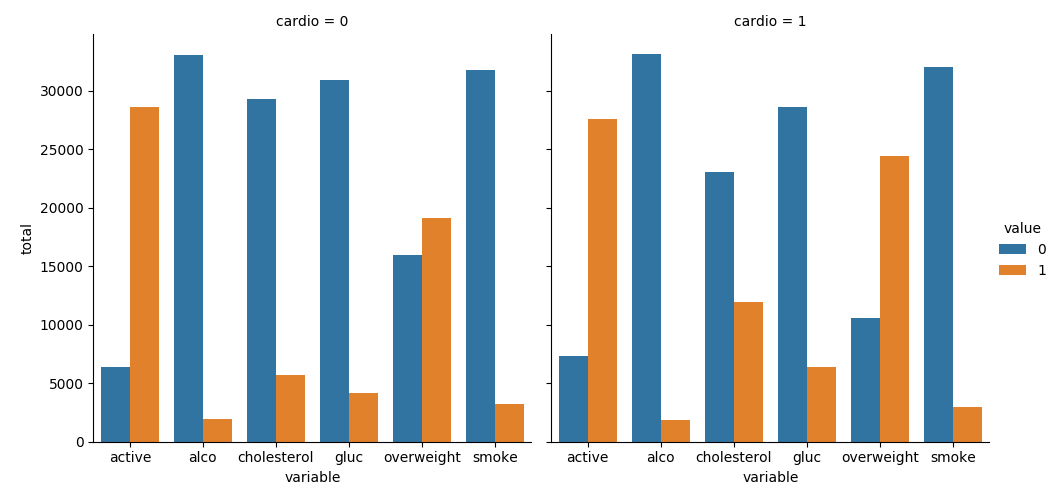

In [15]:
def draw_cat_plot():

    df_cat = pd.melt(df, id_vars=['cardio'],value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat["total"] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).count()
    df_cat_filtered = df_cat[df_cat["value"].isin([0,1])]
    fig = sns.catplot(data=df_cat_filtered, kind="bar", x="variable", y="total", hue="value", col="cardio").fig
    fig.savefig('catplot.png')
    return fig

pd.melt is used to convert the dataframe from a wide format to a long format.

The id_vars argument specifies the column to use as identifier variables. In this case, it is the "cardio" column. The value_vars argument specifies the columns to unpivot. In this case, those are the columns: 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

After applying melt, the resulting dataframe df_cat will have a "variable" column containing the names of the unpivoted columns and a "value" column containing the corresponding values from those columns.

3.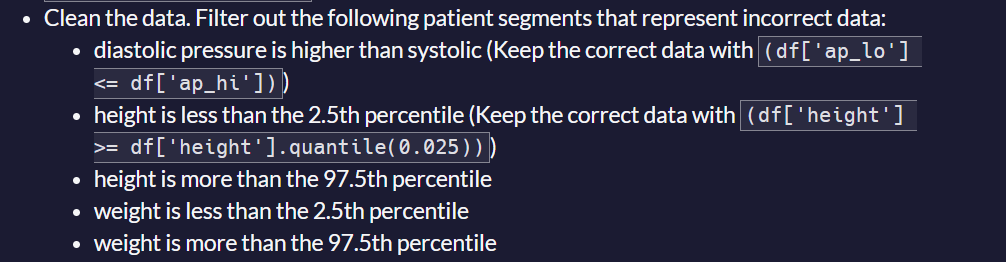

In [17]:
def draw_heat_map():
  #clean data
  df_heat = df[
      (df["ap_lo"] <= df["ap_hi"]) &
      (df["height"] >= df["height"].quantile(0.025)) &
      (df["height"] <= df["height"].quantile(0.975)) &
      (df['weight'] >= df['weight'].quantile(0.025)) &
      (df['weight'] <= df['weight'].quantile(0.975))
  ]
  #calculate the correlation Matrix
  corr = df_heat.corr(method = "pearson")

  #generate mask for upper triangle
  mask = np.triu(corr)

  #set up the matplotlib figure
  fig, ax = plt.subplots(figsize=(11, 11))

  #heat map
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
  fig.savefig('heatmap.png')
  return fig


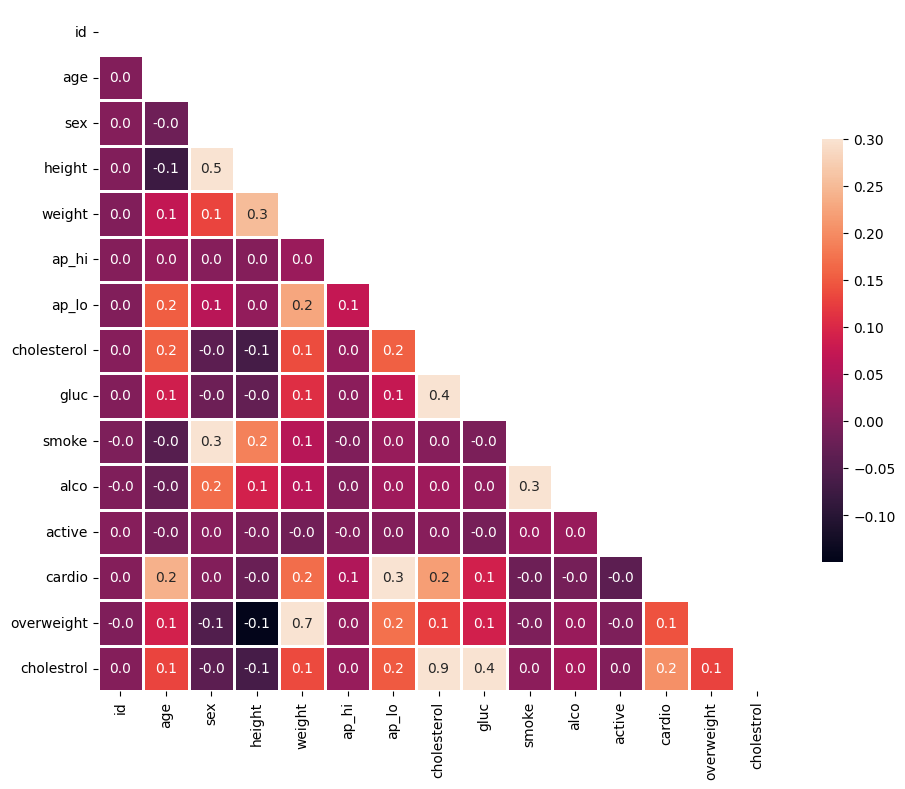

In [24]:
df_heat = df[(df["ap_lo"] <= df["ap_hi"]) &
(df["height"] >= df["height"].quantile(0.025)) &
(df["height"] <= df["height"].quantile(0.975)) &
(df['weight'] >= df['weight'].quantile(0.025)) &
(df['weight'] <= df['weight'].quantile(0.975))]
  #calculate the correlation Matrix
corr = df_heat.corr(method = "pearson")

  #generate mask for upper triangle
mask = np.triu(corr)

  #set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 11))

  #heat map
cmap = sns.color_palette("rocket", as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0.08, annot = True, fmt = ".1f", cmap = cmap,
            square=True, linewidths=1, cbar_kws={"shrink": .5})
fig.savefig('heatmap.png')